# Implementing MLP with Keras

In [1]:
import tensorflow as tf
from tensorflow import keras
print(f'Tensorflow: {tf.__version__}')
print(f'Keras: {keras.__version__}')

Tensorflow: 2.9.0
Keras: 2.9.0


## Retrieve Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
y_train_full.shape

(60000,)

In [5]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

In [5]:
import matplotlib.pyplot as plt

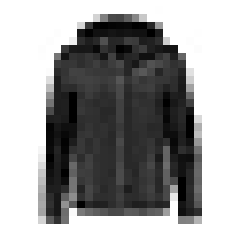

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
hidden_1 = model.layers[1]

In [14]:
hidden_1.name

'dense'

In [15]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [16]:
model.get_layer("dense") is hidden_1

True

In [17]:
weights, biases = hidden_1.get_weights()

In [18]:
weights

array([[-0.01134795, -0.00675106, -0.05229093, ..., -0.00418186,
        -0.0598775 ,  0.07106587],
       [-0.06409153,  0.06776159, -0.02407165, ...,  0.04460551,
         0.01744158,  0.05997975],
       [ 0.03930804,  0.04812739, -0.05321988, ...,  0.01309039,
        -0.06734356, -0.04260853],
       ...,
       [ 0.02149198, -0.05270053, -0.03208856, ..., -0.07283658,
         0.0736753 , -0.00592466],
       [-0.01340818,  0.05039493,  0.01156279, ..., -0.02094003,
        -0.01815743, -0.04891075],
       [-0.0362381 ,  0.0325959 ,  0.00557808, ..., -0.05187834,
        -0.01060393, -0.06449775]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

In [22]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",#keras.optimizers.SGD(lr=0.01)
    metrics=["accuracy"]
)

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7263 - accuracy: 0.7650 - val_loss: 0.5224 - val_accuracy: 0.8214
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4863 - accuracy: 0.8310 - val_loss: 0.4471 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4407 - accuracy: 0.8459 - val_loss: 0.4128 - val_accuracy: 0.8580
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4137 - accuracy: 0.8548 - val_loss: 0.4182 - val_accuracy: 0.8520
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3927 - accuracy: 0.8610 - val_loss: 0.3862 - val_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3783 - accuracy: 0.8671 - val_loss: 0.3720 - val_accuracy: 0.8748
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3659 - accuracy: 0.8703 - val_loss: 0.3684 - val_accuracy:

In [6]:
import pandas as pd

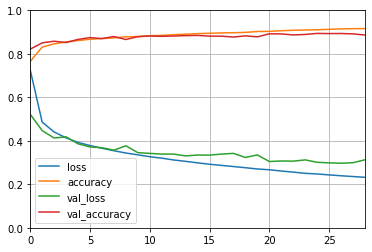

In [25]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df)
plt.grid(True)
plt.gca().set_ylim(0, 1)# set vertical range to [0-1]
plt.gca().set_xlim(0, 28)
plt.legend(history_df.keys())
plt.show()

## Creating Regression MLP

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 691us/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 474us/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 474us/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 452us/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 455us/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 463us/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 466us/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 460us/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 452us/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 460us/step - loss: 0.487

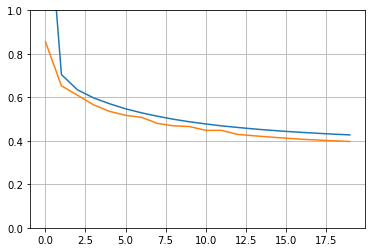

In [7]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022797 ]], dtype=float32)

## Functional API

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [13]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_2[0][0]                    
                                                                 dense_6[0][0]         

In [15]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 653us/step - loss: 1.8772 - val_loss: 0.6913
Epoch 2/20
363/363 [==============================] - 0s 474us/step - loss: 0.6501 - val_loss: 0.9454
Epoch 3/20
363/363 [==============================] - 0s 477us/step - loss: 0.6012 - val_loss: 0.6622
Epoch 4/20
363/363 [==============================] - 0s 471us/step - loss: 0.5654 - val_loss: 0.5284
Epoch 5/20
363/363 [==============================] - 0s 471us/step - loss: 0.5414 - val_loss: 0.5004
Epoch 6/20
363/363 [==============================] - 0s 479us/step - loss: 0.5181 - val_loss: 0.5894
Epoch 7/20
363/363 [==============================] - 0s 471us/step - loss: 0.5035 - val_loss: 0.5889
Epoch 8/20
363/363 [==============================] - 0s 490us/step - loss: 0.4904 - val_loss: 0.4690
Epoch 9/20
363/363 [==============================] - 0s 499us/step - loss: 0.4769 - val_loss: 0.5305
Epoch 10/20
363/363 [==============================] - 0s 493us/step - loss: 0.467

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [16]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [17]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
_______________________________________________________________________________________

In [18]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit([X_train_A, X_train_B], y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 763us/step - loss: 2.0090 - val_loss: 0.9850
Epoch 2/20
363/363 [==============================] - 0s 546us/step - loss: 0.7896 - val_loss: 0.7180
Epoch 3/20
363/363 [==============================] - 0s 507us/step - loss: 0.6514 - val_loss: 0.6402
Epoch 4/20
363/363 [==============================] - 0s 510us/step - loss: 0.5991 - val_loss: 0.5778
Epoch 5/20
363/363 [==============================] - 0s 512us/step - loss: 0.5671 - val_loss: 0.5449
Epoch 6/20
363/363 [==============================] - 0s 507us/step - loss: 0.5423 - val_loss: 0.5190
Epoch 7/20
363/363 [==============================] - 0s 504us/step - loss: 0.5228 - val_loss: 0.5011
Epoch 8/20
363/363 [==============================] - 0s 504us/step - loss: 0.5073 - val_loss: 0.4808
Epoch 9/20
363/363 [==============================] - 0s 512us/step - loss: 0.4945 - val_loss: 0.4661
Epoch 10/20
363/363 [==============================] - 0s 529us/step - loss: 0.484

Adding an auxiliary output for regularization

In [19]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [20]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           930         dense_11[0][0]                   
_______________________________________________________________________________________

In [21]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))


In [22]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 948us/step - loss: 2.2680 - main_output_loss: 1.9510 - aux_output_loss: 5.1214 - val_loss: 2.7346 - val_main_output_loss: 2.1457 - val_aux_output_loss: 8.0346
Epoch 2/20
363/363 [==============================] - 0s 576us/step - loss: 1.0709 - main_output_loss: 0.8465 - aux_output_loss: 3.0910 - val_loss: 1.5914 - val_main_output_loss: 0.8960 - val_aux_output_loss: 7.8500
Epoch 3/20
363/363 [==============================] - 0s 576us/step - loss: 0.8526 - main_output_loss: 0.7034 - aux_output_loss: 2.1957 - val_loss: 1.2902 - val_main_output_loss: 0.6649 - val_aux_output_loss: 6.9176
Epoch 4/20
363/363 [==============================] - 0s 576us/step - loss: 0.7558 - main_output_loss: 0.6404 - aux_output_loss: 1.7942 - val_loss: 1.1200 - val_main_output_loss: 0.6066 - val_aux_output_loss: 5.7407
Epoch 5/20
363/363 [==============================] - 0s 582us/step - loss: 0.6982 - main_output_loss: 0.5992 - aux_output_loss: 1.5896 

In [23]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 531us/step - loss: 0.4880 - main_output_loss: 0.4318 - aux_output_loss: 0.9943
